In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

In [3]:
def model_diagnostics(model, pr=True):
    """
    Returns and prints the R-squared, RMSE and the MAE for a trained model
    """
    y_predicted = model.predict(X_test)
    r2 = r2_score(y_test, y_predicted)
    mse = mean_squared_error(y_test, y_predicted)
    mae = mean_absolute_error(y_test, y_predicted)
    if pr:
        print(f"R-Sq: {r2:.4}")
        print(f"RMSE: {np.sqrt(mse)}")
        print(f"MAE: {mae}")
    
    return [r2,np.sqrt(mse),mae]
def plot_residuals(y_test, y_predicted):
    """"
    Plots the distribution for actual and predicted values of the target variable. Also plots the distribution for the residuals
    """
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)
    sns.distplot(y_test, ax=ax0, kde = False)
    ax0.set(xlabel='Test scores')
    sns.distplot(y_predicted, ax=ax1, kde = False)
    ax1.set(xlabel="Predicted scores")
    plt.show()
    fig, ax2 = plt.subplots()
    sns.distplot((y_test-y_predicted), ax = ax2,kde = False)
    ax2.set(xlabel="Residuals")
    plt.show()
def y_test_vs_y_predicted(y_test,y_predicted):
    """
    Produces a scatter plot for the actual and predicted values of the target variable
    """
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_predicted)
    ax.set_xlabel("Test Scores")
    ax.set_ylim([-75, 1400])
    ax.set_ylabel("Predicted Scores")
    plt.show()
def get_feature_importance(model):
    """
    For fitted tree based models, get_feature_importance can be used to get the feature importance as a tidy output
    """
    X_non_text = pd.get_dummies(df[cat_cols])
    features = numeric_cols + bool_cols + list(X_non_text.columns)
    feature_importance = dict(zip(features, model.feature_importances_))
    for name, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
        print(f"{name:<30}: {importance:>6.2%}")
        print(f"\nTotal importance: {sum(feature_importance.values()):.2%}")
    return feature_importance

In [5]:
df = pd.read_csv('/content/sample_data/dataset.csv')

In [9]:
df.head()

,controversiality,body,subreddit_id,link_id,stickied,subreddit,score,ups,author_flair_css_class,created_utc,author_flair_text,author,id,edited,parent_id,gilded,distinguished,retrieved_on
0,0,A look at Vietnam and Mexico exposes the myth ...,t5_6,t3_17863,False,reddit.com,2,2,NaN,1134365188,NaN,frjo,c13,False,t3_17863,0,NaN,1473738411
1,0,"The site states ""What can I use it for? Meetin...",t5_6,t3_17866,False,reddit.com,1,1,NaN,1134365725,NaN,zse7zse,c14,False,t3_17866,0,NaN,1473738411
2,0,Jython related topics by Frank Wierzbicki,t5_6,t3_17869,False,reddit.com,0,0,NaN,1134366848,NaN,[deleted],c15,False,t3_17869,0,NaN,1473738411
3,0,[deleted],t5_6,t3_17870,False,reddit.com,1,1,NaN,1134367660,NaN,[deleted],c16,False,t3_17870,0,NaN,1473738411
4,0,Saft is by far the best extension you could ta...,t5_6,t3_17817,False,reddit.com,1,1,NaN,1134367754,NaN,rjoseph,c17,False,t3_17817,0,NaN,1473738411


In [23]:
df = df.fillna(0)

In [27]:
bool_cols = ['over_18', 'is_edited', 'is_quoted', 'is_selftext']
cat_cols = ['subreddit', 'distinguished']

numeric_cols = ['gilded', 'controversiality']

In [28]:
lb = LabelBinarizer()
cat = [lb.fit_transform(df[col]) for col in cat_cols]
t = df.loc[:, numeric_cols].values
final = [t]  + cat
y = df.score.values
x = np.column_stack(tuple(final))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [30]:
model_performance_dict = dict()

In [31]:
baseline = DummyRegressor(strategy='mean')
baseline.fit(X_train,y_train)
model_performance_dict["Baseline"] = model_diagnostics(baseline)

R-Sq: -0.003336
RMSE: 3.0247232574580574
MAE: 1.8042725797728503


In [32]:
linear = LinearRegression()
linear.fit(X_train,y_train)
model_performance_dict["Linear Regression"] = model_diagnostics(linear)

R-Sq: 0.003172
RMSE: 3.0148976832863794
MAE: 1.8090895166526373


In [33]:
lasso = LassoCV(cv=30).fit(X_train, y_train)
model_performance_dict["Lasso Regression"] = model_diagnostics(lasso)


R-Sq: 0.003171
RMSE: 3.0148989162700945
MAE: 1.8090666781407854


In [34]:
ridge = RidgeCV(cv=10).fit(X_train, y_train)
model_performance_dict["Ridge Regression"] = model_diagnostics(ridge)

R-Sq: 0.003181
RMSE: 3.0148837568092657
MAE: 1.809009829587058


In [35]:
elastic_net = ElasticNetCV(cv = 30).fit(X_train, y_train)
model_performance_dict["Elastic Net Regression"] = model_diagnostics(elastic_net)

R-Sq: 0.003172
RMSE: 3.0148970329556923
MAE: 1.8089700551565133


In [36]:
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
model_performance_dict["KNN Regression"] = model_diagnostics(knr)

R-Sq: -0.1279
RMSE: 3.206940148533968
MAE: 2.1869767441860466


In [37]:
dt = DecisionTreeRegressor(min_samples_split=45, min_samples_leaf=45, random_state = 10)
dt.fit(X_train, y_train)
model_performance_dict["Decision Tree"] = model_diagnostics(dt)

R-Sq: -0.003336
RMSE: 3.0247232574580574
MAE: 1.8042725797728503


In [38]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=70, min_samples_leaf=10, random_state = 10)
rf.fit(X_train, y_train)
model_performance_dict["Random Forest"] = model_diagnostics(rf)

R-Sq: 0.003039
RMSE: 3.015098168407681
MAE: 1.8094648296645635


In [39]:
gbr = GradientBoostingRegressor(n_estimators=70, max_depth=5)
gbr.fit(X_train, y_train)
model_performance_dict["Gradient Boosting Regression"] = model_diagnostics(gbr)

R-Sq: 0.003172
RMSE: 3.0148966358688365
MAE: 1.8090864984623571


In [40]:
def model_comparison(model_performance_dict, sort_by = 'RMSE', metric = 'RMSE'):

    Rsq_list = []
    RMSE_list = []
    MAE_list = []
    for key in model_performance_dict.keys():
        Rsq_list.append(model_performance_dict[key][0])
        RMSE_list.append(model_performance_dict[key][1])
        MAE_list.append(model_performance_dict[key][2])

    props = pd.DataFrame([])

    props["R-squared"] = Rsq_list
    props["RMSE"] = RMSE_list
    props["MAE"] = MAE_list
    props.index = model_performance_dict.keys()
    props = props.sort_values(by = sort_by)

    fig, ax = plt.subplots(figsize = (12,6))

    ax.bar(props.index, props[metric], color="blue")
    plt.title(metric)
    plt.xlabel('Model')
    plt.xticks(rotation = 45)
    plt.ylabel(metric)

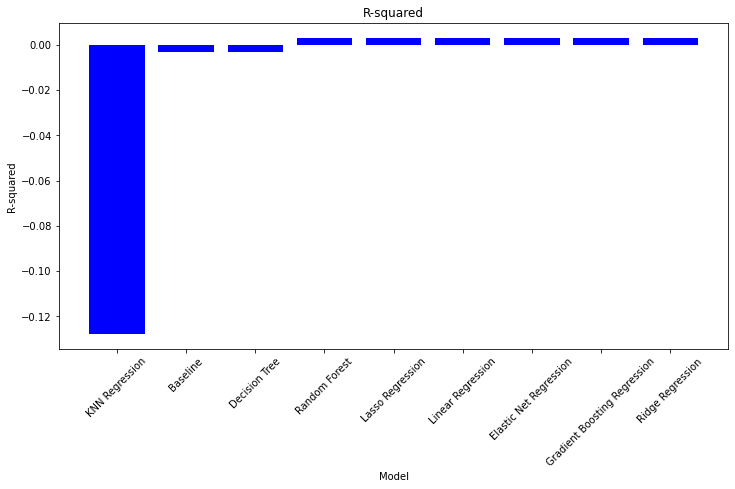

In [47]:
model_comparison(model_performance_dict, sort_by = 'R-squared', metric = 'R-squared')

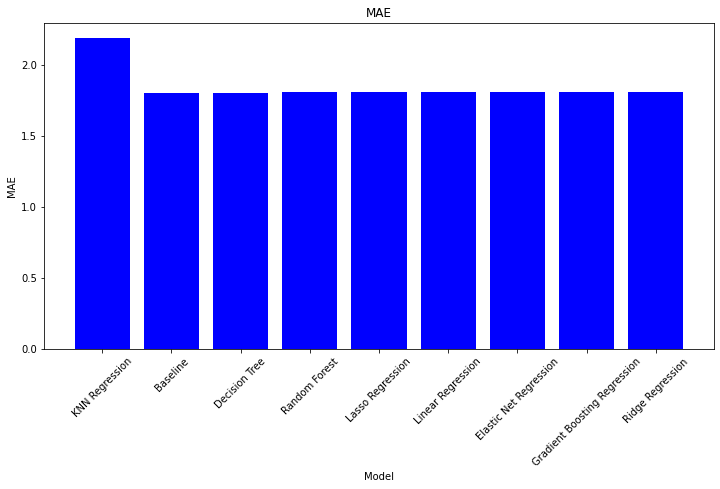

In [43]:
model_comparison(model_performance_dict, sort_by = 'R-squared', metric = 'MAE')

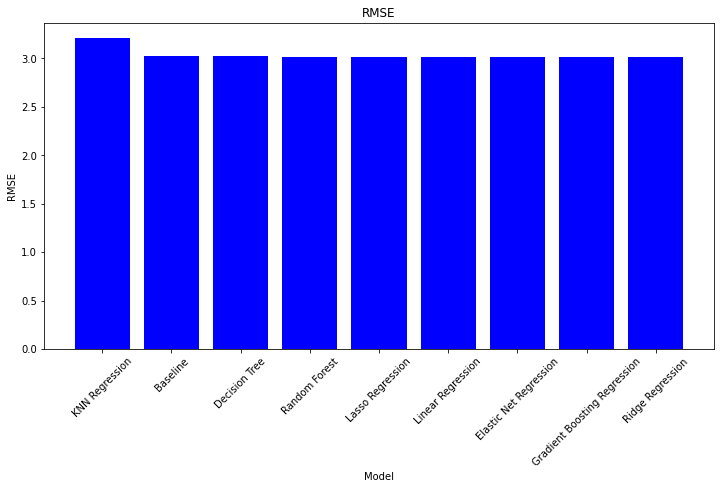

In [44]:
model_comparison(model_performance_dict, sort_by = 'R-squared', metric = 'RMSE')

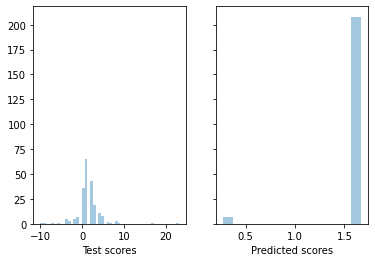

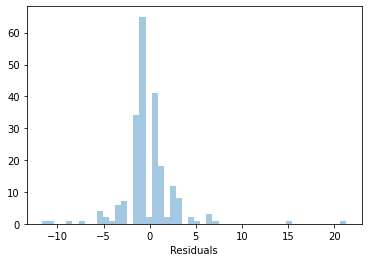

In [45]:
y_predicted = rf.predict(X_test)
plot_residuals(y_test,y_predicted)

In [46]:
rf_importances = get_feature_importance(rf)

controversiality              : 100.00%

Total importance: 100.00%
gilded                        :  0.00%

Total importance: 100.00%
over_18                       :  0.00%

Total importance: 100.00%
is_edited                     :  0.00%

Total importance: 100.00%
